<div class="alert alert-block alert-info">
<h3><b> Final Project </b></h3>

**Class:** DATA 230 - Sec 22 - Fall 2024

**Team 5:** Cheng-Huan Yu, Chun-Chieh Kuo, Khac Minh Dai Vo, Lam Tran

**Date:** December 4th, 2024

In [9]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Model Selection and Splitting
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
)
from sklearn.metrics import roc_curve, auc




data = pd.read_csv('smoking.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

## 1. Create new columns

- Body Mass Index (BMI) is a widely used measure to assess whether an individual has a healthy weight for their height.

- The Waist-to-Height Ratio (WHtR) is a simple and effective measure of body fat distribution and a predictor of health risks related to obesity.

- The AST/ALT Ratio, also known as the De Ritis Ratio, is a diagnostic tool used in clinical medicine to assess liver function and help identify the underlying causes of liver diseases.

- The LDL/HDL Ratio is an important marker for assessing cardiovascular health.

- The Triglyceride-to-HDL Ratio (TG/HDL Ratio) is an important biomarker used to assess cardiovascular health and metabolic risk.

In [10]:
data['BMI'] = data['weight(kg)'] / ((data['height(cm)'] / 100) ** 2)
data['AST/ALT Ratio'] = data['AST'] / data['ALT']
data['LDL/HDL Ratio'] = data['LDL'] / data['HDL']
data['Triglyceride HDL Ratio'] = data['triglyceride'] / data['HDL']
data['tartar'] = data['tartar'].replace({'Y': 1, 'N': 0})
data['gender'] = data['gender'].replace({'M': 1, 'F': 0})
data['Waist to Height Ratio'] = data['waist(cm)'] / data['height(cm)']

data = data.drop(columns=['ID', 'height(cm)', 'weight(kg)', 'waist(cm)', 'AST', 'ALT', 'LDL', 'HDL', 'triglyceride','oral'])

def classify_wht_ratio(wht):
    if wht >= 0.5:
        return 1
    else:
        return 0
    
data['WHtR-Based Risk'] = data['Waist to Height Ratio'].apply(classify_wht_ratio)

data

/var/folders/2x/ljq3jznx5tv30732jmhftt2h0000gn/T/ipykernel_48832/2802350996.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['tartar'] = data['tartar'].replace({'Y': 1, 'N': 0})
/var/folders/2x/ljq3jznx5tv30732jmhftt2h0000gn/T/ipykernel_48832/2802350996.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'M': 1, 'F': 0})


,gender,age,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Gtp,dental caries,tartar,smoking,BMI,AST/ALT Ratio,LDL/HDL Ratio,Triglyceride HDL Ratio,Waist to Height Ratio,WHtR-Based Risk
0,0,40,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,...,27.0,0,1,0,24.973985,0.947368,1.726027,1.123288,0.524516,1
1,0,40,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,...,18.0,0,1,0,23.437500,1.157895,3.023810,2.738095,0.506250,1
2,1,55,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,...,22.0,0,0,1,20.761246,1.312500,2.745455,3.309091,0.470588,0
3,1,40,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,...,18.0,0,1,0,25.711662,0.730769,5.022222,5.644444,0.533333,1
4,0,40,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,...,22.0,0,0,0,24.973985,1.142857,1.725806,1.193548,0.554839,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,...,10.0,1,1,0,22.491349,2.000000,1.573333,1.320000,0.441176,0
55688,0,45,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,...,14.0,0,1,0,19.531250,1.666667,1.082192,0.945205,0.437500,0
55689,0,55,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,...,12.0,0,0,0,19.531250,1.545455,0.797468,0.974684,0.428125,0
55690,1,60,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,...,18.0,0,0,0,22.038567,1.052632,3.041667,1.645833,0.472727,0


In [11]:
data.columns

Index(['gender', 'age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)',
       'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'hemoglobin', 'Urine protein', 'serum creatinine', 'Gtp',
       'dental caries', 'tartar', 'smoking', 'BMI', 'AST/ALT Ratio',
       'LDL/HDL Ratio', 'Triglyceride HDL Ratio', 'Waist to Height Ratio',
       'WHtR-Based Risk'],
      dtype='object')

## 2. Feature Selections

## PCA for classification models

In [12]:
correlation_matrix = data.corr()
correlation_matrix

,gender,age,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Gtp,dental caries,tartar,smoking,BMI,AST/ALT Ratio,LDL/HDL Ratio,Triglyceride HDL Ratio,Waist to Height Ratio,WHtR-Based Risk
gender,1.000000,-0.290095,0.127424,0.125680,-0.009407,-0.011579,0.167289,0.177891,0.098117,-0.085270,...,0.237270,0.084408,0.055473,0.510340,0.213837,-0.316867,0.134082,0.273663,0.054312,0.053315
age,-0.290095,1.000000,-0.195472,-0.192723,0.203993,0.208722,0.134023,0.050745,0.182351,0.055557,...,0.013031,-0.114984,-0.081796,-0.162557,-0.063384,0.176842,0.021242,0.009750,0.230199,0.207137
eyesight(left),0.127424,-0.195472,1.000000,0.354574,-0.046571,-0.048788,-0.019330,0.005199,-0.041851,-0.004985,...,0.003850,0.003684,0.012532,0.061204,0.029536,-0.056973,0.002674,0.018636,-0.052515,-0.045439
eyesight(right),0.125680,-0.192723,0.354574,1.000000,-0.043877,-0.046623,-0.013720,0.011357,-0.044006,-0.007851,...,0.012195,0.016359,0.006568,0.063017,0.031788,-0.065928,0.006466,0.020632,-0.043832,-0.034762
hearing(left),-0.009407,0.203993,-0.046571,-0.043877,1.000000,0.510095,0.055219,0.008754,0.042314,-0.023276,...,0.012864,-0.016100,-0.035396,-0.023209,-0.004973,0.043137,-0.004304,0.009684,0.070702,0.055666
hearing(right),-0.011579,0.208722,-0.048788,-0.046623,0.510095,1.000000,0.049095,0.001651,0.041339,-0.023058,...,0.009245,-0.016376,-0.026698,-0.018855,-0.010095,0.050155,-0.004224,0.005423,0.065234,0.048606
systolic,0.167289,0.134023,-0.019330,-0.013720,0.055219,0.049095,1.000000,0.761051,0.172700,0.059572,...,0.165724,0.029894,0.006542,0.073109,0.299640,-0.123609,0.056329,0.169297,0.298518,0.247153
relaxation,0.177891,0.050745,0.005199,0.011357,0.008754,0.001651,0.761051,1.000000,0.147879,0.095357,...,0.177648,0.031634,0.021659,0.108309,0.280662,-0.139289,0.076399,0.185185,0.252341,0.212443
fasting blood sugar,0.098117,0.182351,-0.041851,-0.044006,0.042314,0.041339,0.172700,0.147879,1.000000,0.009903,...,0.182414,0.001231,0.010902,0.100279,0.171535,-0.126739,0.044608,0.215487,0.215480,0.179219
Cholesterol,-0.085270,0.055557,-0.004985,-0.007851,-0.023276,-0.023058,0.059572,0.095357,0.009903,1.000000,...,0.083531,-0.001119,0.015246,-0.028548,0.094269,-0.072481,0.481288,0.127524,0.110978,0.101948


In [13]:
features = [
    'gender', 'age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)',
    'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
    'Cholesterol', 'hemoglobin', 'Urine protein', 'serum creatinine', 'Gtp',
    'dental caries', 'tartar', 'smoking', 'BMI',
    'AST/ALT Ratio', 'LDL/HDL Ratio', 'Triglyceride HDL Ratio'
]

# Extract features for PCA
X_pca_features = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_features)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Create a DataFrame for explained variance
pca_variance_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance,
    "Cumulative Variance Ratio": cumulative_variance
})
pca_variance_df

,Principal Component,Explained Variance Ratio,Cumulative Variance Ratio
0,PC1,0.170278,0.170278
1,PC2,0.099306,0.269584
2,PC3,0.075719,0.345303
3,PC4,0.069692,0.414994
4,PC5,0.061382,0.476376
5,PC6,0.055430,0.531806
6,PC7,0.051752,0.583559
7,PC8,0.048415,0.631974
8,PC9,0.045174,0.677148
9,PC10,0.040458,0.717606


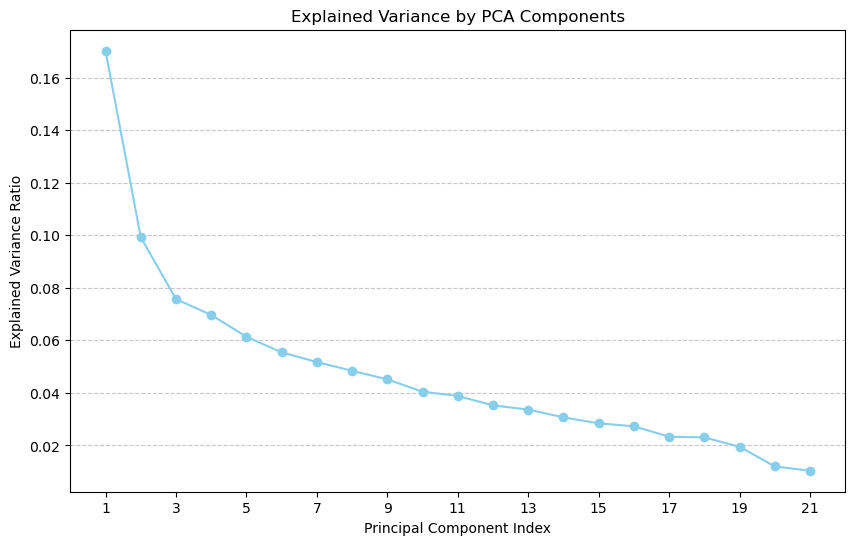

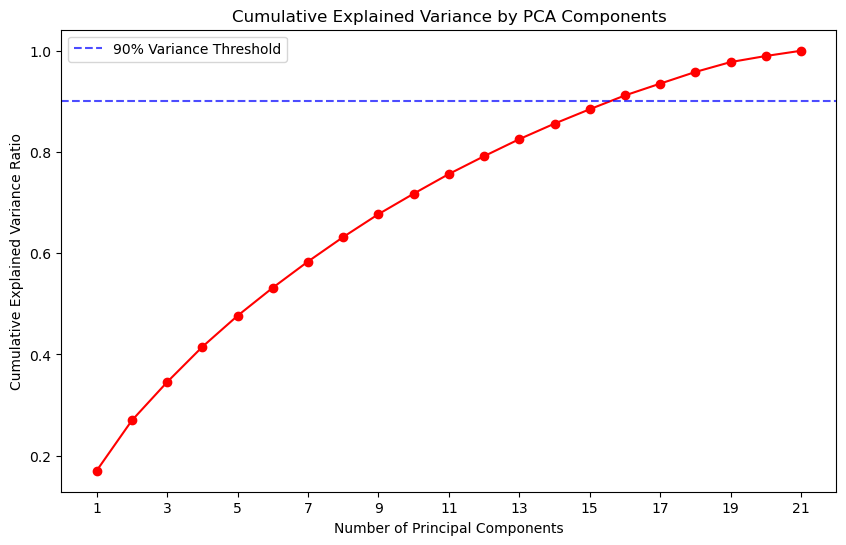

In [14]:
# Line plot for explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='skyblue')
plt.xticks(range(1, len(cumulative_variance) + 1,2))  # Set explicit x-ticks for each component

plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='red')
plt.xticks(range(1, len(cumulative_variance) + 1,2))  # Set explicit x-ticks for each component
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.9, color='blue', linestyle='--', alpha=0.7, label='90% Variance Threshold')
plt.legend()
plt.show()



In [15]:
all_features = [
    'gender', 'age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)',
       'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'hemoglobin', 'Urine protein', 'serum creatinine', 'Gtp',
       'dental caries', 'tartar', 'smoking', 'BMI','AST/ALT Ratio', 'LDL/HDL Ratio',
        'Triglyceride HDL Ratio'
]

X = data[all_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # `X` is your feature set
y = data['WHtR-Based Risk']  # Target variable

# Step 2: Apply PCA
n_components = 16  # Adjust this based on explained variance analysis
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
Logistic_Regression_report = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(Logistic_Regression_report)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
RandomForest_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(RandomForest_report)

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_report = classification_report(y_test, y_pred_knn)
print("k-NN Classification Report:")
print(knn_report)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
DecisionTree_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(DecisionTree_report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      5844
           1       0.82      0.79      0.81      5295

    accuracy                           0.82     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.82      0.82      0.82     11139

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      5844
           1       0.86      0.86      0.86      5295

    accuracy                           0.87     11139
   macro avg       0.87      0.87      0.87     11139
weighted avg       0.87      0.87      0.87     11139

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      5844
           1       0.79      0.76      0.77      5295

    accuracy                           0.79     11139
   macro avg       0

In [16]:
# Assuming the classification reports for each model have been run with output_dict=True
logistic_dict = classification_report(y_test, y_pred_lr, output_dict=True)
random_forest_dict = classification_report(y_test, y_pred_rf, output_dict=True)
knn_dict = classification_report(y_test, y_pred_knn, output_dict=True)
decision_tree_dict = classification_report(y_test, y_pred_dt, output_dict=True)

# Extract the metrics for each model
table = {
    "Model": ["Logistic Regression", "Random Forest", "k-NN", "Decision Tree"],
    "Accuracy": [
        logistic_dict["accuracy"],
        random_forest_dict["accuracy"],
        knn_dict["accuracy"],
        decision_tree_dict["accuracy"],
    ],
    "Precision (1)": [
        logistic_dict["1"]["precision"],
        random_forest_dict["1"]["precision"],
        knn_dict["1"]["precision"],
        decision_tree_dict["1"]["precision"],
    ],
    "Precision (0)": [
        logistic_dict["0"]["precision"],
        random_forest_dict["0"]["precision"],
        knn_dict["0"]["precision"],
        decision_tree_dict["0"]["precision"],
    ],
    "Recall (1)": [
        logistic_dict["1"]["recall"],
        random_forest_dict["1"]["recall"],
        knn_dict["1"]["recall"],
        decision_tree_dict["1"]["recall"],
    ],
    "Recall (0)": [
        logistic_dict["0"]["recall"],
        random_forest_dict["0"]["recall"],
        knn_dict["0"]["recall"],
        decision_tree_dict["0"]["recall"],
    ],
    "F1-Score (1)": [
        logistic_dict["1"]["f1-score"],
        random_forest_dict["1"]["f1-score"],
        knn_dict["1"]["f1-score"],
        decision_tree_dict["1"]["f1-score"],
    ],
    "F1-Score (0)": [
        logistic_dict["0"]["f1-score"],
        random_forest_dict["0"]["f1-score"],
        knn_dict["0"]["f1-score"],
        decision_tree_dict["0"]["f1-score"],
    ],
}

# Create a DataFrame for the metrics
metrics_pca = pd.DataFrame(table)

# Round metrics to 2 decimal places
metrics_pca = metrics_pca.round(2)
metrics_pca

,Model,Accuracy,Precision (1),Precision (0),Recall (1),Recall (0),F1-Score (1),F1-Score (0)
0,Logistic Regression,0.82,0.82,0.82,0.79,0.85,0.81,0.83
1,Random Forest,0.87,0.86,0.87,0.86,0.88,0.86,0.88
2,k-NN,0.79,0.79,0.79,0.76,0.81,0.77,0.80
3,Decision Tree,0.81,0.80,0.82,0.80,0.82,0.80,0.82


# classification model

In [17]:
all_features = [
    'gender', 'age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)',
       'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'hemoglobin', 'Urine protein', 'serum creatinine', 'Gtp',
       'dental caries', 'tartar', 'smoking', 'BMI','AST/ALT Ratio', 'LDL/HDL Ratio',
        'Triglyceride HDL Ratio'
]

X = data[all_features]
y = data['WHtR-Based Risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model for feature selection
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance from the trained model
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_importances


rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5844
           1       0.89      0.86      0.87      5295

    accuracy                           0.88     11139
   macro avg       0.88      0.88      0.88     11139
weighted avg       0.88      0.88      0.88     11139



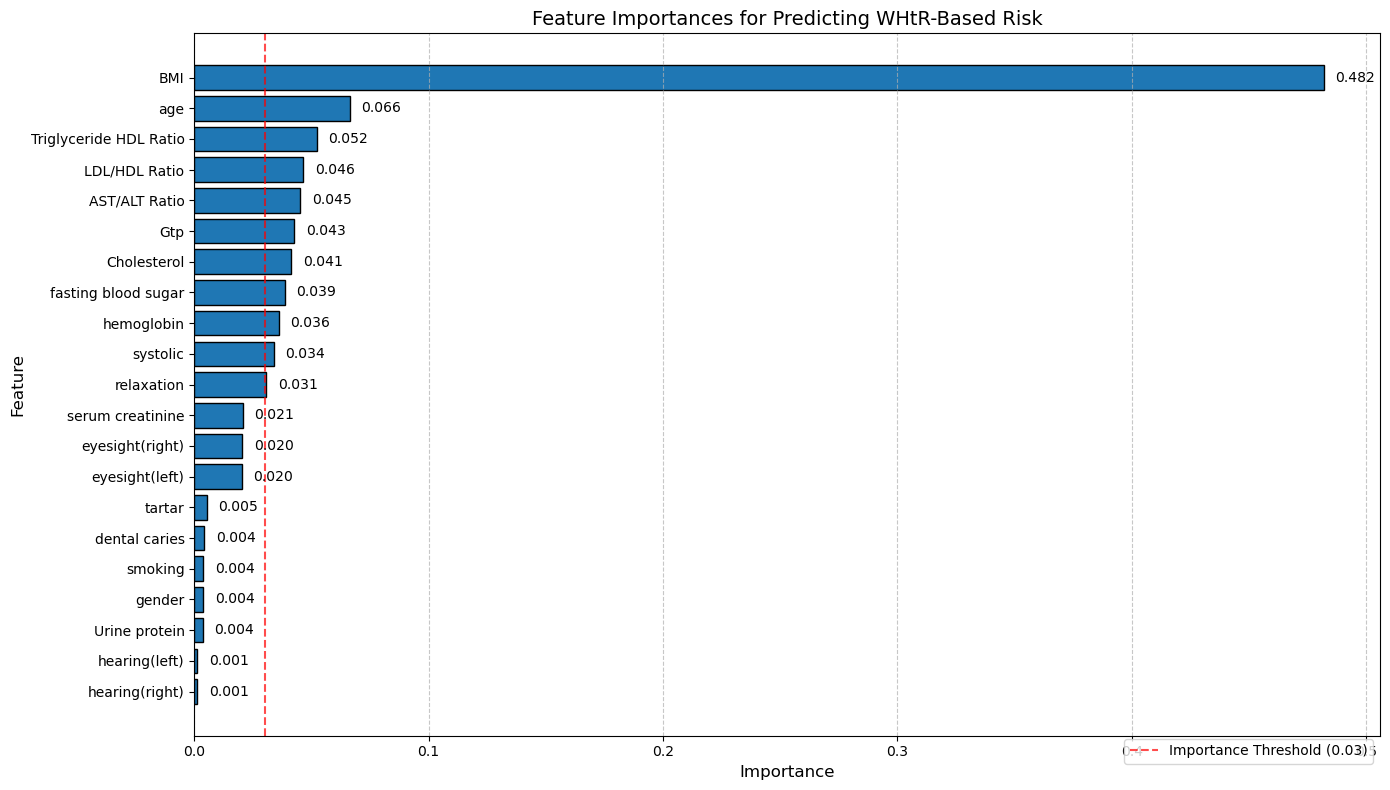

In [18]:

# Adjust figure size
plt.figure(figsize=(14, 8))

# Plot feature importance bars
plt.barh(feature_importances['Feature'], feature_importances['Importance'], edgecolor='black')

# Add a threshold line
threshold = 0.03
plt.axvline(x=threshold, color='red', linestyle='--', alpha=0.7, label='Importance Threshold (0.03)')

# Annotate the bars with importance scores
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=10)

# Adjust the position of the legend to the lower-right corner
plt.legend(fontsize=10, loc='lower right', bbox_to_anchor=(1.0, -0.05))

# Invert y-axis for correct order
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importances for Predicting WHtR-Based Risk', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything properly
plt.show()

In [19]:
selected_features = ['BMI', 'age', 'Triglyceride HDL Ratio', 'LDL/HDL Ratio', 
                     'AST/ALT Ratio', 'Gtp', 'Cholesterol', 
                     'fasting blood sugar', 'hemoglobin', 'systolic', 'relaxation']

X = data[selected_features]
y = data['WHtR-Based Risk']

# Assuming X and y are defined with your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler and scale data for k-NN and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
Logistic_Regression_report = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(Logistic_Regression_report)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
RandomForest_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(RandomForest_report)

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_report = classification_report(y_test, y_pred_knn)
print("k-NN Classification Report:")
print(knn_report)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
DecisionTree_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:")
print(DecisionTree_report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      5844
           1       0.83      0.81      0.82      5295

    accuracy                           0.83     11139
   macro avg       0.83      0.83      0.83     11139
weighted avg       0.83      0.83      0.83     11139

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5844
           1       0.89      0.86      0.87      5295

    accuracy                           0.88     11139
   macro avg       0.88      0.88      0.88     11139
weighted avg       0.88      0.88      0.88     11139

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      5844
           1       0.80      0.79      0.79      5295

    accuracy                           0.81     11139
   macro avg       0

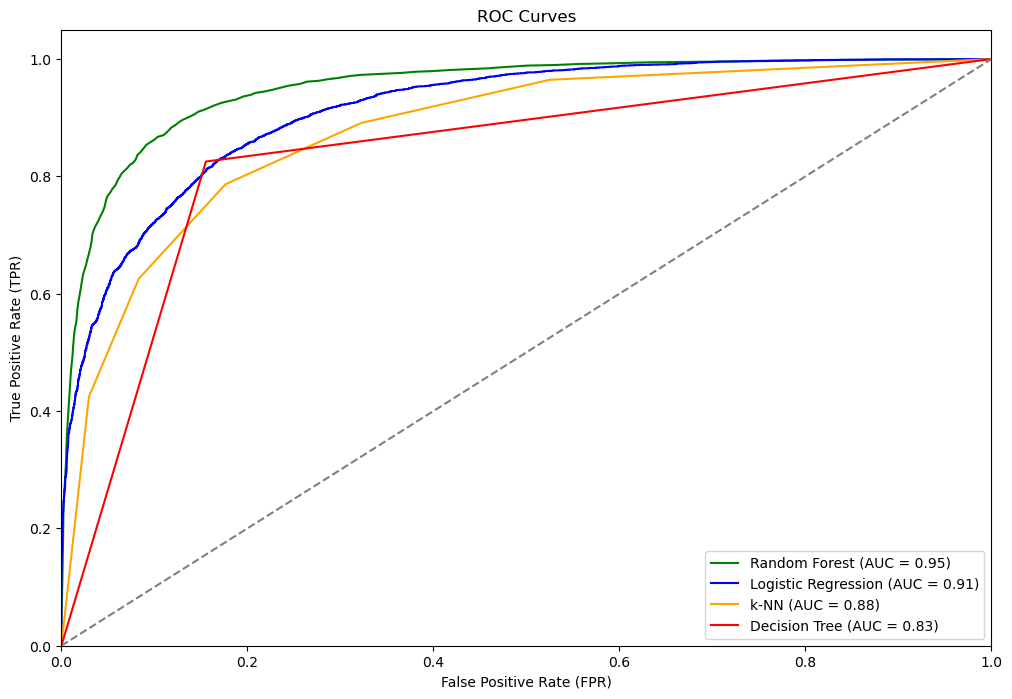

In [20]:
# Logistic Regression AUC-ROC
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest AUC-ROC
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# k-NN AUC-ROC
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Decision Tree AUC-ROC
y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting all AUC-ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.2f})', color='orange')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


In [21]:
# Convert classification reports to dictionaries
logistic_dict = classification_report(y_test, y_pred_lr, output_dict=True)
random_forest_dict = classification_report(y_test, y_pred_rf, output_dict=True)
knn_dict = classification_report(y_test, y_pred_knn, output_dict=True)
decision_tree_dict = classification_report(y_test, y_pred_dt, output_dict=True)

# Extract the metrics for each model
table = {
    "Model": ["Logistic Regression", "Random Forest", "k-NN", "Decision Tree"],
    "Accuracy": [
        logistic_dict["accuracy"],
        random_forest_dict["accuracy"],
        knn_dict["accuracy"],
        decision_tree_dict["accuracy"],
    ],

    "Precision (1)": [
        logistic_dict["1"]["precision"],
        random_forest_dict["1"]["precision"],
        knn_dict["1"]["precision"],
        decision_tree_dict["1"]["precision"],
    ],
    "Precision (0)": [
        logistic_dict["0"]["precision"],
        random_forest_dict["0"]["precision"],
        knn_dict["0"]["precision"],
        decision_tree_dict["0"]["precision"],
    ],

    "Recall (1)": [
        logistic_dict["1"]["recall"],
        random_forest_dict["1"]["recall"],
        knn_dict["1"]["recall"],
        decision_tree_dict["1"]["recall"],
    ],
    
    "Recall (0)": [
        logistic_dict["0"]["recall"],
        random_forest_dict["0"]["recall"],
        knn_dict["0"]["recall"],
        decision_tree_dict["0"]["recall"],
    ],
    
    "F1-Score (1)": [
        logistic_dict["1"]["f1-score"],
        random_forest_dict["1"]["f1-score"],
        knn_dict["1"]["f1-score"],
        decision_tree_dict["1"]["f1-score"],
    ],
    "F1-Score (0)": [
        logistic_dict["0"]["f1-score"],
        random_forest_dict["0"]["f1-score"],
        knn_dict["0"]["f1-score"],
        decision_tree_dict["0"]["f1-score"],
    ]
}

# Create a DataFrame for the metrics
metrics = pd.DataFrame(table)

metrics = metrics.round(2)
metrics

,Model,Accuracy,Precision (1),Precision (0),Recall (1),Recall (0),F1-Score (1),F1-Score (0)
0,Logistic Regression,0.83,0.83,0.83,0.81,0.85,0.82,0.84
1,Random Forest,0.88,0.89,0.88,0.86,0.90,0.87,0.89
2,k-NN,0.81,0.80,0.81,0.79,0.82,0.79,0.82
3,Decision Tree,0.84,0.83,0.84,0.83,0.84,0.83,0.84
